Trabalho de analise de dados sobre a evolução do microcredito no Brasil 
- Periodo de 01/03/2011 até os dias atuais. 

# Bibliotecas

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# 1. Compreensão dos Dados e Preparação 

In [3]:
df = pd.read_excel("/Users/estevanladislau/Documents/Project/Readme/STP-20231129105548981.xlsx")
df.head()

,Data,20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes),20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes),20782 - Taxa mÈdia de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.a.,20922 - Prazo mÈdio das concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses,21001 - Prazo mÈdio da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses,21080 - Percentual da carteira de crÈdito com recursos direcionados com atraso entre 15 e 90 dias - Pessoas fÌsicas - MicrocrÈdito total - %,21159 - InadimplÍncia da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - %,25507 - Taxa mÈdia mensal de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.m.
0,2011-03-01,2414,320,27.49,17.04,8.29,7.73,5.37,2.04
1,2011-04-01,2447,333,26.97,18.30,8.18,7.43,5.51,2.01
2,2011-05-01,2465,348,29.23,12.45,7.86,7.41,5.85,2.16
3,2011-06-01,2465,331,31.80,7.95,7.57,7.45,5.91,2.33
4,2011-07-01,2442,298,33.48,7.42,7.34,6.42,6.06,2.44


In [12]:
df.dtypes

Data                                                                                                                                            datetime64[ns]
20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)                                     int64
20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)                                            int64
20782 - Taxa mÈdia de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.a.                         float64
20922 - Prazo mÈdio das concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses                                 float64
21001 - Prazo mÈdio da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses                                    float64
21080 - Percentual da carteira de crÈdito com 

In [5]:
# Adicionar as colunas de Ano e Mes para auxiliar na elaboração do gráficos 
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month

# Definir os dados de Ano e Mes em type (int)
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce').fillna(0).astype(int)
df['Mes'] = pd.to_numeric(df['Mes'], errors='coerce').fillna(0).astype(int)

# Mostar os primeiros valores da base de dados 
df.head()

,Data,20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes),20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes),20782 - Taxa mÈdia de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.a.,20922 - Prazo mÈdio das concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses,21001 - Prazo mÈdio da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses,21080 - Percentual da carteira de crÈdito com recursos direcionados com atraso entre 15 e 90 dias - Pessoas fÌsicas - MicrocrÈdito total - %,21159 - InadimplÍncia da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - %,25507 - Taxa mÈdia mensal de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.m.,Ano,Mes
0,2011-03-01,2414,320,27.49,17.04,8.29,7.73,5.37,2.04,2011,3
1,2011-04-01,2447,333,26.97,18.30,8.18,7.43,5.51,2.01,2011,4
2,2011-05-01,2465,348,29.23,12.45,7.86,7.41,5.85,2.16,2011,5
3,2011-06-01,2465,331,31.80,7.95,7.57,7.45,5.91,2.33,2011,6
4,2011-07-01,2442,298,33.48,7.42,7.34,6.42,6.06,2.44,2011,7


In [6]:
# Retornar se possui valor nulo na planilha 
df.isnull().any()


Data                                                                                                                                            False
20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)                            False
20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)                                   False
20782 - Taxa mÈdia de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.a.                  False
20922 - Prazo mÈdio das concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses                          False
21001 - Prazo mÈdio da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses                             False
21080 - Percentual da carteira de crÈdito com recursos direcionados com atraso entre 15 e 90 dias - 

In [18]:
df.shape

(151, 11)

Os dados que estamos utilizando foram acessados no site oficioal do BC(Banco Central). Os dados vieram organizados e limpos, sem contar valores nulos e inconsistentes. Isso irá acelerar a elaboração do trabalho, pois muito do trabalho de organização não será necessário realizar. 

Temos a disposição dados sobre Microcrédito direcionado para pessoas físicas com início das amostragem em 2011 até 2023.


# 2. Concessões de Microcrédito
##### A concessão de Microcrédito teve diversas variações ao longo dos anos, influenciado por diversos eventos economicos e mudanças legislativas. 
##### Nos gráficos abaixo, vamos focar em dois periodos:
#### 1. Regulação das Finthes pelo BC(Banco Central) - 2018
#### 2. COVID 19 - 2019/2020


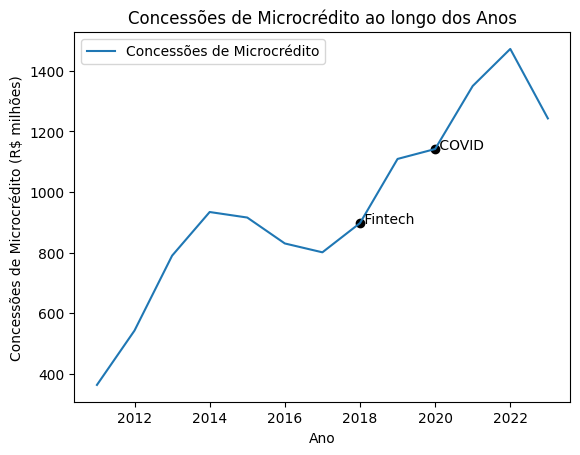

Porcentagem de Crescimento de Concessões de Microcrédito:
Ano
2011          NaN
2012    49.471993
2013    45.553678
2014    18.254722
2015    -1.954136
2016    -9.346560
2017    -3.523743
2018    12.039542
2019    23.618464
2020     2.952667
2021    18.222287
2022     9.067901
2023   -15.580961
Name: 20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes), dtype: float64


In [7]:
# Agrupe os valores das concessões de microcrédito pessoa física total por ano
concessoes_microcredito_total = df.groupby(['Ano'])['20712 - Concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)'].mean()

# Crie o gráfico de linha
plt.plot(concessoes_microcredito_total, label='Concessões de Microcrédito')

# Adicione pontos para os anos de 2018 e 2020
plt.scatter([2018, 2020], [concessoes_microcredito_total.loc[2018], concessoes_microcredito_total.loc[2020]], color='black')

# Adicione rótulos e título
plt.xlabel('Ano')
plt.ylabel('Concessões de Microcrédito (R$ milhões)')
plt.title('Concessões de Microcrédito ao longo dos Anos')

# Adicione textos aos pontos
plt.text(2018, concessoes_microcredito_total.loc[2018], ' Fintech', fontsize=10, color='black')
plt.text(2020, concessoes_microcredito_total.loc[2020], ' COVID', fontsize=10, color='black')

plt.legend()
plt.show()

# Calcular a porcentagem de crescimento de cada ano
crescimento_percentual = (concessoes_microcredito_total.diff() / concessoes_microcredito_total.shift()) * 100
print("Porcentagem de Crescimento de Concessões de Microcrédito:")
print(crescimento_percentual)

Pensando em cenário economico, observamos que em 2017 iniciou um crise, fazendo com que os níveis de consessão de crédito elevace aos patamares anteriores. Em 2018 tivemo a regulamentação das Fintechs de crédito que impulsionaram o mercado como um todo, superando todos os níveis anteriores com relação a consessão de créditos. Dois anos aopós a regulamentação, tivemos um momento de grande estress economico, a chagada do COVID fez com que a busca por crédito e renegociação de dividas continuacem a crescer. Podemos observar esse movimento no gráfico exposto acima.

# 3. Inadimplência 

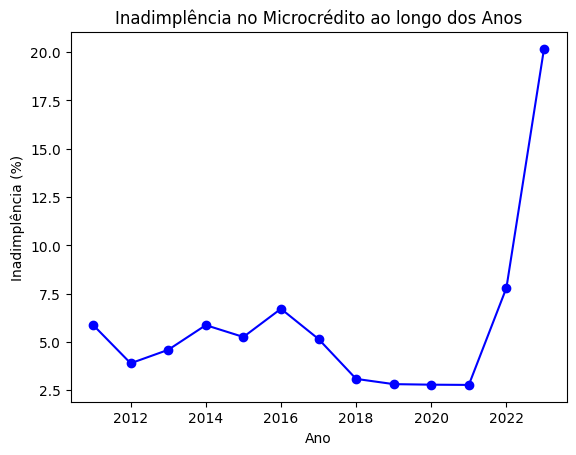


Porcentagem de inadimplência comparada com o ano anterior:
Ano
2011           NaN
2012    -33.761411
2013     17.890006
2014     27.827192
2015    -10.437376
2016     27.762803
2017    -23.306031
2018    -40.064725
2019     -8.801296
2020     -1.006513
2021     -0.448565
2022    181.045359
2023    158.629044
Name: 21159 - InadimplÍncia da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - %, dtype: float64


In [8]:
# Agrupe os valores da inadimplência por ano
inadimplencia_microcredito = df.groupby(['Ano'])['21159 - InadimplÍncia da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - %'].mean()

# Plotar o gráfico de inadimplência com formatação
plt.plot(inadimplencia_microcredito, marker='o', linestyle='-', color='b', label='Inadimplência')

# Adicionar rótulos e título ao gráfico
plt.title('Inadimplência no Microcrédito ao longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Inadimplência (%)')

# Exibir o gráfico
plt.show()

# Calcular a porcentagem de inadimplência comparado com o ano anterior 
inadimplencia_percentual = (inadimplencia_microcredito.diff() / inadimplencia_microcredito.shift()) * 100

# Imprimir a porcentagem de inadimplência formatada
print('\nPorcentagem de inadimplência comparada com o ano anterior:')
print(inadimplencia_percentual)

Seguindo as analises, mesmo com um grande voluma na concessão dos créditos no periodo de maior stress da economia, os níveis de inadimplência vieram se mantando baixo para os níveis históricos registrados. Em 2021 os níveis dos Juros começaram a elevar de forma gradativa, aumentando o custo dos empréstimos e os prazos dos créditos continuaram subindo, gerando uma receita que eleva o custo do crédito trazendo conssigo uma elevação vertiginosa nos níveis de indimplência. 

# 4. Juros

Valor de correlaçao:
0.5765227226588078


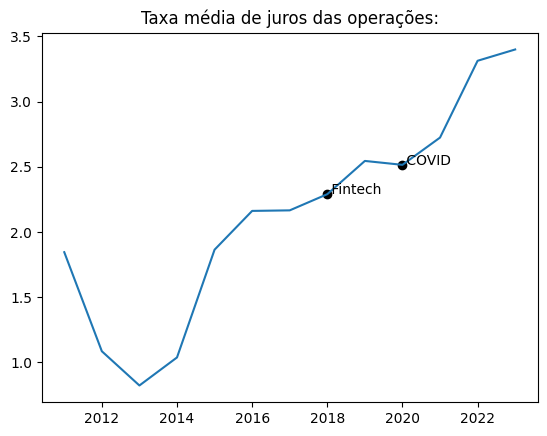

In [9]:
# Agrupar os valores por ano 
media_taxajuros = df.groupby(['Ano'])['25507 - Taxa mÈdia mensal de juros das operaÁıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - % a.m.'].mean()

# Plotar o gráfico de taxa média das aperações 
plt.plot(media_taxajuros)

# Definir o título do gráfico 
plt.title('Taxa média de juros das operações:')

# Adicione pontos para os anos de 2018 e 2020
plt.scatter([2018, 2020], [media_taxajuros.loc[2018], media_taxajuros.loc[2020]], color='black')

# Calcular a correlação
correlacao_juros_inadimplencia = media_taxajuros.corr(inadimplencia_percentual)

# Adicione textos aos pontos
plt.text(2018, media_taxajuros.loc[2018], ' Fintech', fontsize=10, color='black')
plt.text(2020, media_taxajuros.loc[2020], ' COVID', fontsize=10, color='black')

# Definir o título
print('Valor de correlaçao:')

# Retornar o valor de correlação
print(correlacao_juros_inadimplencia)

# 5. Prazo das concessões 

Correlação inadimplencia com prazo das concessões:
0.7939311078076556


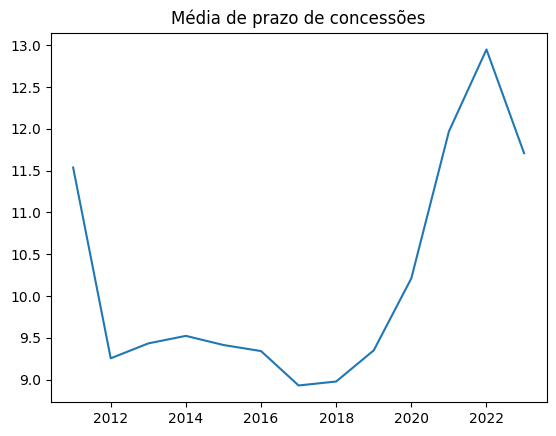

In [10]:
# Agrupar prazo médio das concessões com os anos 
media_prazo = df.groupby(['Ano'])['20922 - Prazo mÈdio das concessıes de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - Meses'].mean()

# Plotar o gráfico 
plt.plot(media_prazo)

# Definir o título do gráfico
plt.title('Média de prazo de concessões')

# Realizar o célculo de correlação da média dos prazos das concessões com inadimplência 
correlacao_prazo_inadimplencia = media_prazo.corr(inadimplencia_percentual)

# Demonstrar o título
print('Correlação inadimplencia com prazo das concessões:')

# Imporimir o valor da correlação 
print(correlacao_prazo_inadimplencia)

O aumento nos prazos pode ser utilizado de diversas maneiras no mercado de crédito. Muitas das vezes o aumento nos prazos nos informa um maior incentivo na concessão dos créditos, pois possibilita uma menor parcela no crédito, incentivando assim a tomadad de mais crédito, em contra partida, pode nos mostar que foi utilizado por conta do aumente crescente nas taxas de juros, forçando o aumento nos prazos, para facilitar o acesso ao crédito. Esse aumento nos prazos como demonstrado acima, possui uma alta correlação com a inadimplência (0.79), mostrando que o aumente nos prazos faz com que as taxas de inadimplencia subam. Com o pico no final de 2021, é perceptivel que as financeiras iniciaram uma forte redução no novos contratos, uma tentativa de trazer as taxas de inadimplência para baixo. Mesmo com esse movimento, as taxas de inadimplência continuaram a subir, muito por conta dos níveis de juros ainda estarem em patamares elevados dos praticados nos últimos anos. Os níveis de concessão de crédito estão diminuindo, monstrando que o mercado está em retração nesse momento, muito diferente do que foi visto em 2021 que teve um crescimente acima de 18% comparado ao ano anterior. 



# 6. Valor das carteiras  

Crescimento do Saldo da carteira
Ano
2011          NaN
2012    25.522350
2013    46.001020
2014    29.026682
2015    -4.596243
2016    -7.079368
2017    -9.335713
2018     2.214735
2019    19.051419
2020    20.222656
2021    28.815573
2022    27.831724
2023     1.058221
Name: 20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes), dtype: float64


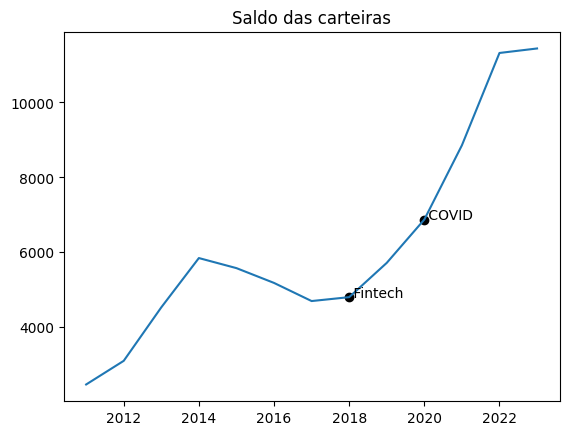

In [22]:
# Agrupar os valores por ano 
saldo_carteiras = df.groupby(['Ano'])['20620 - Saldo da carteira de crÈdito com recursos direcionados - Pessoas fÌsicas - MicrocrÈdito total - R$ (milhıes)'] .mean()

# Plotar o gráfico de taxa média das aperações 
plt.plot(saldo_carteiras)

# Definir o título do gráfico 
plt.title('Saldo das carteiras')

# Adicione pontos para os anos de 2018 e 2020
plt.scatter([2018, 2020], [saldo_carteiras.loc[2018], saldo_carteiras.loc[2020]], color='black')

# Adicione textos aos pontos
plt.text(2018, saldo_carteiras.loc[2018], ' Fintech', fontsize=10, color='black')
plt.text(2020, saldo_carteiras.loc[2020], ' COVID', fontsize=10, color='black')

# Calcular a porcentagem de crescimento de cada ano
crescimento_percentual_saldo = (saldo_carteiras.diff() / saldo_carteiras.shift()) * 100
print("Crescimento do Saldo da carteira")
print(crescimento_percentual_saldo)



Como todo o mercado, o saldo da carteira veio num movimento de crescimento exponencial, superando todos os valores anteriores encontrado na base de dados. Percebendo os níveis de inadimplência aumentando, percebemos que no ano de 2023 tivemos um aumento somente de 1% sendo que no últimos 4 anos cresceu mais de 94%. 